In [1]:
%%capture
%run Data_Cleaning_and_EDA.ipynb

In [2]:
# Our final clean and normalized training dataset
train_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,Dr,Master,Miss,Mr,Mrs,other,Total_Fam,Pclass*Fare
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,1,0,0,1,10.2500
1,1,1,0,38.0,1,0,PC 17599,71.2833,1,0,0,0,0,0,0,1,0,1,72.2833
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,0,0,0,10.9250


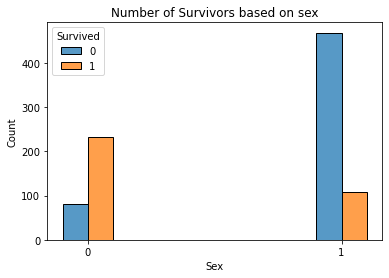

In [3]:
# plt.figure(figsize=(10,10))
plt.title("Number of Survivors based on sex")
plt.xticks([0,1])
sns.histplot(
    data=train_data, x='Sex', hue="Survived", multiple="dodge", bins=[-0.1,0.1,0.9,1.1], stat='count'
);

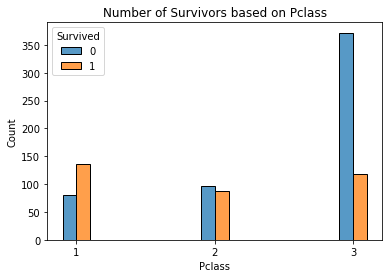

In [4]:
# plt.figure(figsize=(10,10))
plt.title("Number of Survivors based on Pclass")
plt.xticks([1,2,3])
sns.histplot(
    data=train_data, x='Pclass', hue="Survived", multiple="dodge", bins=[0.9,1.1,1.9,2.1,2.9,3.1], stat='count'
);

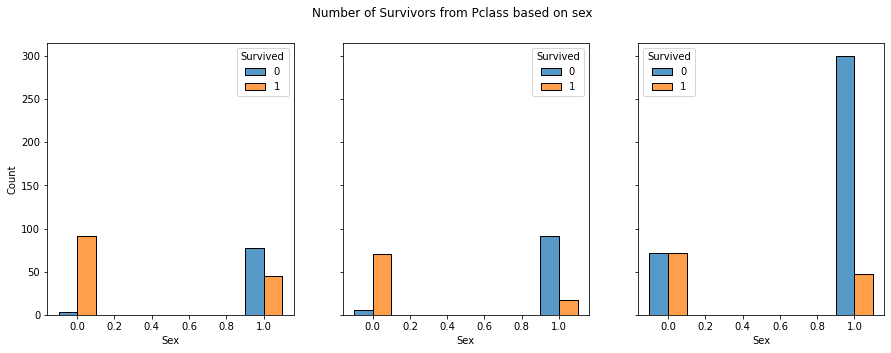

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Number of Survivors from Pclass based on sex')

sns.histplot(
    ax=axes[0], data=train_data[train_data['Pclass']==1], x='Sex', hue="Survived", multiple="dodge", bins=[-0.1,0.1,0.9,1.1], stat='count'
);

sns.histplot(
    ax=axes[1], data=train_data[train_data['Pclass']==2], x='Sex', hue="Survived", multiple="dodge", bins=[-0.1,0.1,0.9,1.1], stat='count'
);
sns.histplot(
    ax=axes[2], data=train_data[train_data['Pclass']==3], x='Sex', hue="Survived", multiple="dodge", bins=[-0.1,0.1,0.9,1.1], stat='count'
);

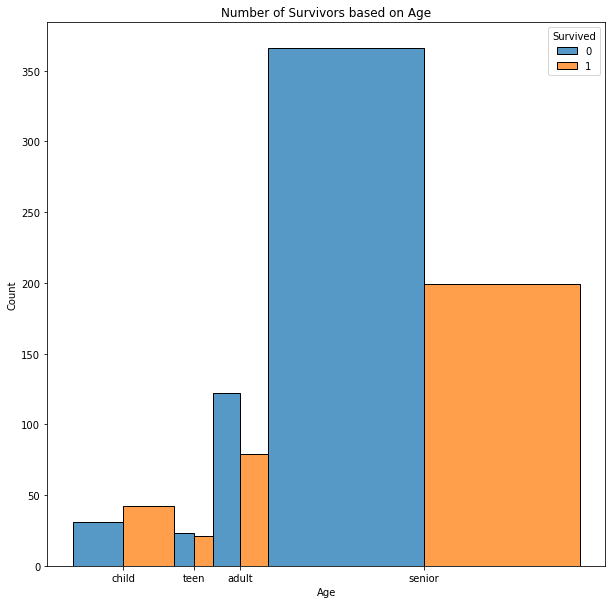

In [6]:
plt.figure(figsize=(10,10))
plt.title("Number of Survivors based on Age")
plt.xticks([6.5,15.5,21.5,45], ['child', 'teen','adult','senior'])
sns.histplot(
    data=train_data, x='Age', hue="Survived", multiple="dodge", stat='count', bins=[0,13,18,25,65]
);

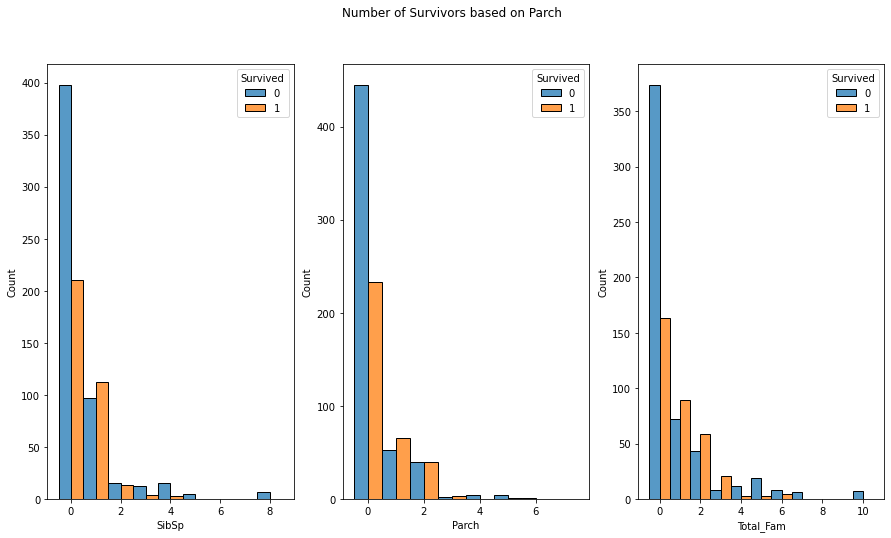

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Number of Survivors based on Parch')

# fig.xticks([0,1,2,3,4,5,6])
sns.histplot(
    ax=axes[0], data=train_data, x='SibSp', hue="Survived", multiple="dodge", stat='count', bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
);
sns.histplot(
    ax=axes[1], data=train_data, x='Parch', hue="Survived", multiple="dodge", stat='count', bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
);
sns.histplot(
    ax=axes[2], data=train_data, x='Total_Fam', hue="Survived", multiple="dodge", stat='count', bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
);


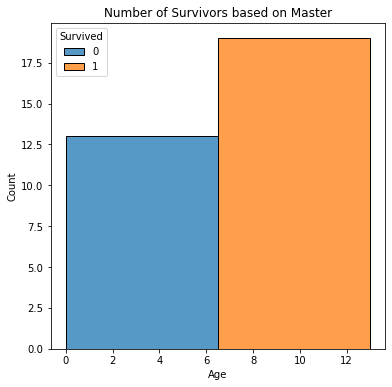

In [87]:
plt.figure(figsize=(6,6))
plt.title("Number of Survivors based on Master")
# plt.xticks([0,1,2,3,4,5,6,7,8])
age_num = 13
sns.histplot(
    data=train_data[(train_data['Age']<age_num)&(train_data['Sex']==0)], x='Age', hue="Survived", multiple="dodge", stat='count', bins=[0,age_num]
);

In [37]:
example_df=pd.DataFrame(data=train_data[['Ticket']].value_counts(), columns=['num'])
example_lst = [x[0] for x in list(example_df[example_df['num']>1].index)]


- Survived : Whether they survived
- Pclass : Ticket class
- Sex : Sex
- Age: Age in years
- SibSp: Number of siblings / spouses aboard the Titanic
- Parch: Number of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Part of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [42]:
train_data[train_data['Ticket'].isin(example_lst)].sort_values(['Pclass', 'Ticket']).head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,Dr,Master,Miss,Mr,Mrs,other,Total_Fam,Pclass*Fare
257,1,1,0,30.0,0,0,110152,86.5000,0,0,1,0,0,1,0,0,0,0,87.5000
504,1,1,0,16.0,0,0,110152,86.5000,0,0,1,0,0,1,0,0,0,0,87.5000
759,1,1,0,33.0,0,0,110152,86.5000,0,0,1,0,0,0,0,0,1,0,87.5000
262,0,1,1,52.0,1,1,110413,79.6500,0,0,1,0,0,0,1,0,0,2,80.6500
558,1,1,0,39.0,1,1,110413,79.6500,0,0,1,0,0,0,0,1,0,2,80.6500
585,1,1,0,18.0,0,2,110413,79.6500,0,0,1,0,0,1,0,0,0,2,80.6500
110,0,1,1,47.0,0,0,110465,52.0000,0,0,1,0,0,0,1,0,0,0,53.0000
475,0,1,1,30.0,0,0,110465,52.0000,0,0,1,0,0,0,1,0,0,0,53.0000
329,1,1,0,16.0,0,1,111361,57.9792,1,0,0,0,0,1,0,0,0,1,58.9792
523,1,1,0,44.0,0,1,111361,57.9792,1,0,0,0,0,0,0,1,0,1,58.9792


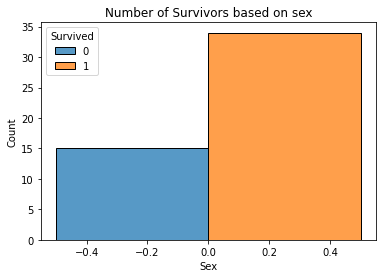

In [49]:
# plt.figure(figsize=(10,10))
plt.title("Number of Survivors based on sex")
sns.histplot(
    data=train_data[(train_data['Parch']>0)&(train_data['Sex']==0)&(train_data['Age']>25)], x='Sex', hue="Survived", multiple="dodge", stat='count'
);